In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

Wav lenght : 1.0, Mes_S shape : (40, 80)


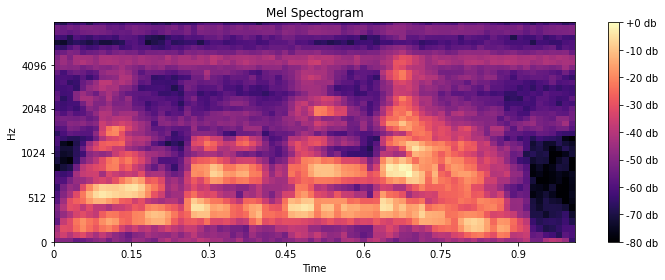

In [32]:
frame_length = 0.025 # win_length, 자연어 처리 분야에서 25ms 크기를 기본으로 하고 있음 (16000Hz -> 400)
frame_stride = 0.0126 # hop_length, 일반적으로 10ms의 크기를 기본으로 하고 있음 (16000Hz -> 160)

def Mel_S(wav_file):
    y, sr = librosa.load(wav_file, sr=16000)
    
    input_nfft = int(round(sr*frame_length))
    input_stride = int(round(sr*frame_stride))
    
    S = librosa.feature.melspectrogram(y=y, n_mels=40, n_fft=input_nfft, hop_length=input_stride)
    
    print(f"Wav lenght : {len(y)/sr}, Mes_S shape : {np.shape(S)}")
    
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', sr=sr, hop_length=input_stride, x_axis='time')
    plt.colorbar(format='%+2.0f db')
    plt.title('Mel Spectogram')
    plt.tight_layout()
    plt.show()
    
    return S

data_path = 'data/원천데이터/abnormal_1s/가스사고_511106_label_1.wav'
mel_spec = Mel_S(data_path)

In [33]:
y, sr = librosa.load(data_path, sr=16000)

y.min(), y.max(), y.mean()

(-0.6342468, 0.7192383, -6.714058e-05)

In [34]:
a = y - y.mean()
a.min(), a.max(), a.mean()

(-0.6341797, 0.7193054, 8.717179e-10)

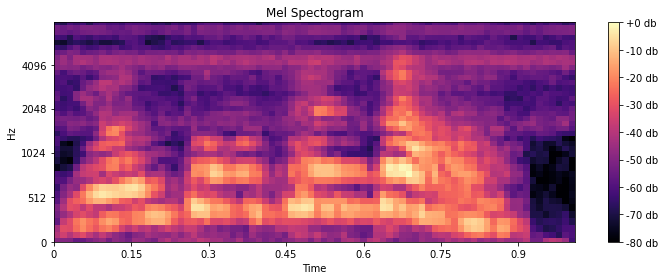

In [35]:
sr = 16000
input_nfft = int(round(sr*frame_length))
input_stride = int(round(sr*frame_stride))

S = librosa.feature.melspectrogram(y=a, n_mels=40, n_fft=input_nfft, hop_length=input_stride)

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='mel', sr=sr, hop_length=input_stride, x_axis='time')
plt.colorbar(format='%+2.0f db')
plt.title('Mel Spectogram')
plt.tight_layout()
plt.show()